In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

import re
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-challenge/sample_submission.csv
/kaggle/input/house-price-prediction-challenge/train.csv
/kaggle/input/house-price-prediction-challenge/test.csv


# Load Data

In [2]:
train= pd.read_csv('/kaggle/input/house-price-prediction-challenge/train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
test= pd.read_csv('/kaggle/input/house-price-prediction-challenge/test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [5]:
train['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [6]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

# EDA

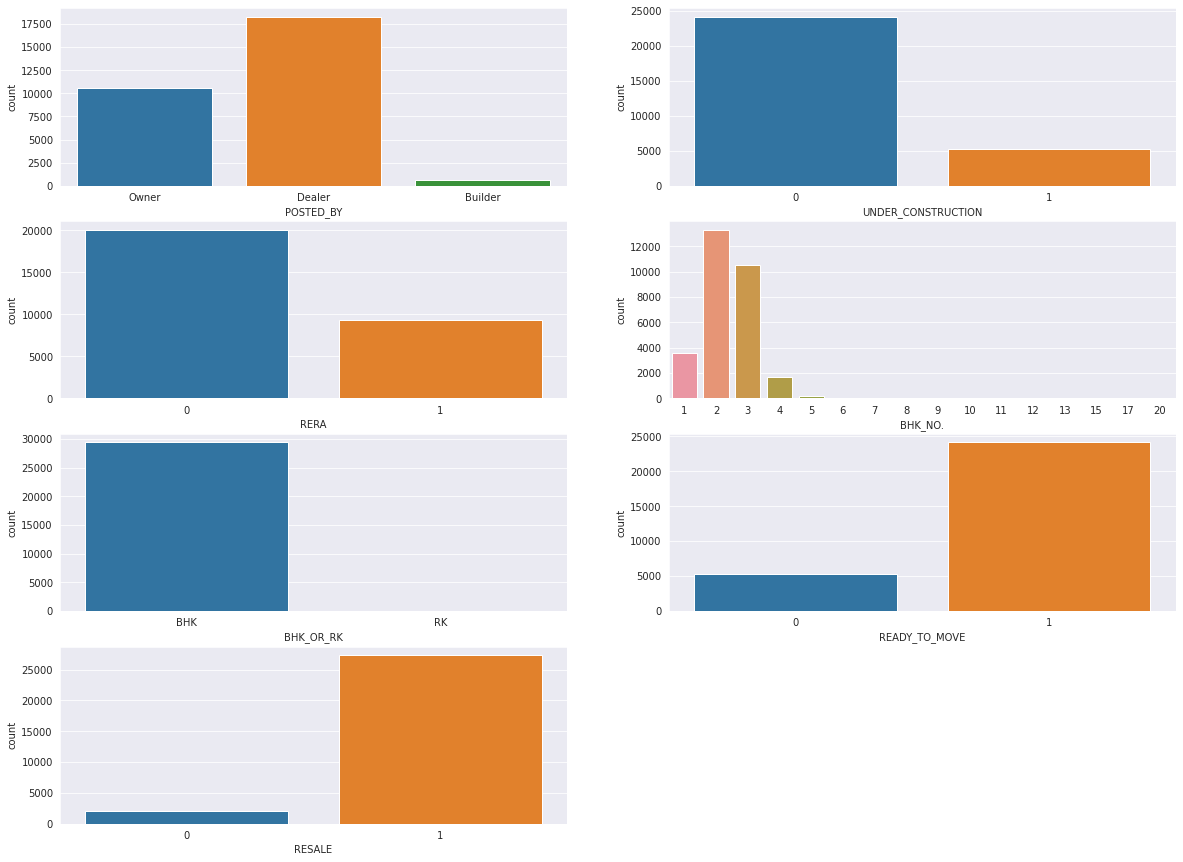

In [8]:
i=1
plt.figure(figsize=(20,15))
for col in ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']:
    plt.subplot(4,2,i)
    sns.countplot(train[col])
    i+=1

In [9]:
train['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [10]:
test['BHK_OR_RK'].value_counts()

BHK    68662
RK        58
Name: BHK_OR_RK, dtype: int64

In [11]:
train.drop(['ADDRESS', 'BHK_OR_RK'], axis=1, inplace=True )
test.drop(['ADDRESS', 'BHK_OR_RK'], axis=1, inplace=True )

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   LONGITUDE              29451 non-null  float64
 8   LATITUDE               29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.2+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   SQUARE_FT           68720 non-null  float64
 5   READY_TO_MOVE       68720 non-null  int64  
 6   RESALE              68720 non-null  int64  
 7   LONGITUDE           68720 non-null  float64
 8   LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 4.7+ MB


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

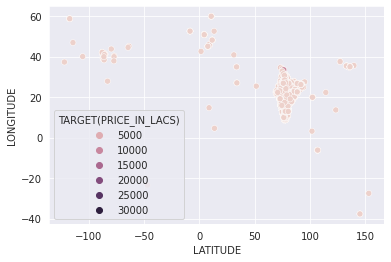

In [14]:
sns.scatterplot(x= 'LATITUDE', y= 'LONGITUDE', hue= 'TARGET(PRICE_IN_LACS)', data=train)

<AxesSubplot:>

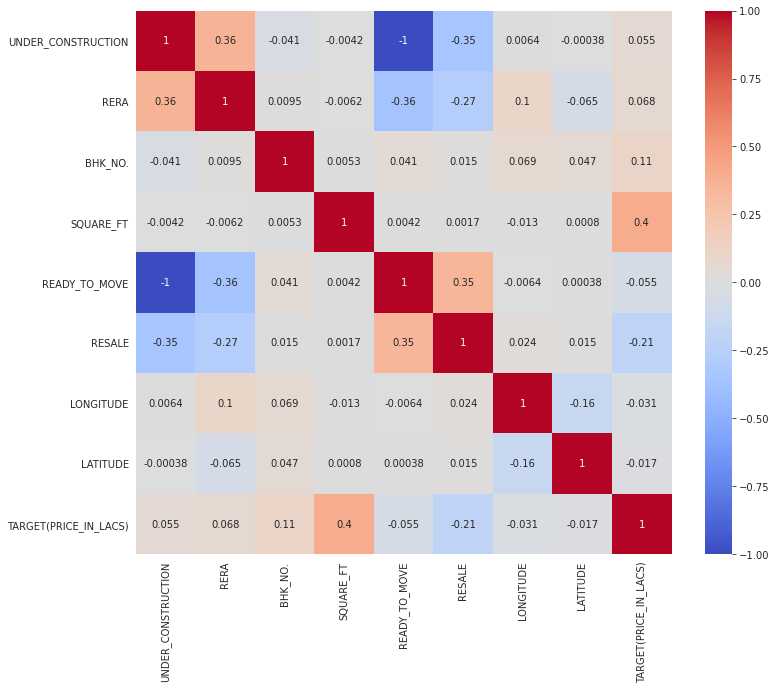

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

# Preprocess

**Ready to Move and Under Construction are completely co-related. So we drop one of them to prevent overfitting**

In [16]:
train.drop('READY_TO_MOVE', axis=1, inplace=True)
test.drop('READY_TO_MOVE', axis=1, inplace=True)

In [17]:
train['POSTED_BY']= train['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})
test['POSTED_BY']= test['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})

In [18]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,1300.236407,1,12.969910,77.597960,55.0
1,1,0,0,2,1275.000000,1,12.274538,76.644605,51.0
2,0,0,0,2,933.159722,1,12.778033,77.632191,43.0
3,0,0,1,2,929.921143,1,28.642300,77.344500,62.5
4,1,1,0,2,999.009247,1,22.592200,88.484911,60.5


In [19]:
X= train.drop('TARGET(PRICE_IN_LACS)', axis=1)
y= train['TARGET(PRICE_IN_LACS)']

In [20]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
0,0,0,0,2,1300.236407,1,12.969910,77.597960
1,1,0,0,2,1275.000000,1,12.274538,76.644605
2,0,0,0,2,933.159722,1,12.778033,77.632191
3,0,0,1,2,929.921143,1,28.642300,77.344500
4,1,1,0,2,999.009247,1,22.592200,88.484911


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [22]:
X_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
10686,1,0,1,3,1250.893495,1,28.527597,77.389374
25017,1,1,1,1,466.994382,1,19.245347,73.124577
7629,0,0,0,3,1340.782123,1,20.353795,85.821020
13544,1,0,0,5,5111.111111,1,21.143354,72.770931
16500,1,0,0,2,1177.059855,1,26.860560,80.915830


In [23]:
X_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
12467,1,0,0,5,4200.019765,1,19.102600,72.824300
6062,1,0,1,3,2092.050209,1,28.388225,76.946376
22745,1,0,1,3,1183.548673,1,19.221571,73.042474
17964,1,1,1,4,2326.122354,1,30.662283,76.822397
18551,0,0,0,2,1200.120012,1,14.432003,79.974789


# Creating Models

**We use several models and then we will select the best model**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [25]:
key= ['RandomForestRegressor', 'DecisionTreeRegressor', 'XGBRegressor', 'CatBoostRegressor']
value= [RandomForestRegressor(), DecisionTreeRegressor(), XGBRegressor(), CatBoostRegressor()]

models= dict(zip(key,value))


In [26]:
models

{'RandomForestRegressor': RandomForestRegressor(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None),
 'CatBoostRegressor': <catboost.core.CatBoostRegressor at 0x7f3c27b98f90>}

In [27]:

for key, value in models.items():
    value.fit(X_train, y_train)
    train_pred= value.predict(X_train)
    test_pred= value.predict(X_test)
    train_error= np.sqrt(mean_squared_error(y_train, train_pred))
    test_error= np.sqrt(mean_squared_error(y_test, test_pred))
    print(f"{key}: \n ")
    print(f"Training error: {train_error} \n")
    print(f"Testing error: {test_error} \n")
    print('\n')
    

RandomForestRegressor: 
 
Training error: 81.93553452855048 

Testing error: 122.63405139462942 



DecisionTreeRegressor: 
 
Training error: 3.2303584361116866 

Testing error: 164.30407167202173 



XGBRegressor: 
 
Training error: 43.444077793252184 

Testing error: 124.97016820978813 



Learning rate set to 0.068493
0:	learn: 639.6685003	total: 56.6ms	remaining: 56.6s
1:	learn: 609.7601918	total: 63ms	remaining: 31.4s
2:	learn: 581.2617330	total: 67.7ms	remaining: 22.5s
3:	learn: 554.6014984	total: 71ms	remaining: 17.7s
4:	learn: 529.2173735	total: 75.7ms	remaining: 15.1s
5:	learn: 505.4780052	total: 78.7ms	remaining: 13s
6:	learn: 484.4323104	total: 82.1ms	remaining: 11.6s
7:	learn: 463.0836324	total: 85.1ms	remaining: 10.5s
8:	learn: 444.4696554	total: 88.3ms	remaining: 9.72s
9:	learn: 425.6390501	total: 91.7ms	remaining: 9.07s
10:	learn: 407.8389137	total: 95ms	remaining: 8.54s
11:	learn: 392.8575796	total: 98.8ms	remaining: 8.13s
12:	learn: 378.9921219	total: 102ms	remaining: 

# **As we can see, RandomForestRegressor is performing best. It is surprising that it performs better CatBoost and XGBoost**

In [28]:
test_pred[:5]

array([1855.77867732,  112.83329225,  143.87336239,   83.89633813,
         51.40182096])

In [29]:
y_test[:5]

12467    1700.0
6062      170.0
22745     240.0
17964     100.0
18551      40.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

# Hyperparameter Tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV

rfr= RandomForestRegressor(criterion='mse', random_state=42)
params=dict(n_estimators= [10,50, 100,200],
       max_depth= [10,50,100,200],
       min_samples_split = [1,2,5,10],
       min_samples_leaf=[1,5,10,20])

grid= RandomizedSearchCV(rfr, param_distributions=params, cv=5)


In [31]:
grid.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [10, 50, 100, 200],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [32]:
grid.best_estimator_

RandomForestRegressor(max_depth=100, min_samples_split=5, random_state=42)

In [33]:
pred= grid.best_estimator_.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

64.47861003152427

# The score has improved significantly after hyperparameter tuning

In [34]:
final_predictions= grid.best_estimator_.predict(test)

In [35]:
sample= pd.read_csv('/kaggle/input/house-price-prediction-challenge/sample_submission.csv')
sample.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [36]:
sample.shape

(68720, 1)

In [37]:
final_predictions.shape

(68720,)

In [38]:
sample['TARGET(PRICE_IN_LACS)']= final_predictions
sample.head()

,TARGET(PRICE_IN_LACS)
0,19.780378
1,74.348027
2,70.769937
3,50.312158
4,11.841584


In [39]:
sample.to_csv('predictions.csv', index=False)

# Upvote and Comment if you liked my notebook :)